## 1. Introduction

---

Name : Ogi Hadicahyo

---

**Background**

While exploring Google Cloud, I found a dataset that contained information about credit card usage over the last 6 months from a bank. This dataset is interesting to me because it can be used to create clustering models. With this data, I can group credit card holders into segments based on their credit card usage behavior. Therefore, I decided to create a clustering model for further analysis.

**Problem statement**

Create a clustering model to group credit card holders into segments based on their credit card usage behavior. This model is useful for credit card service providers to develop more appropriate and effective marketing strategies for each segment, as well as provide services that are more suited to customer needs.

**Dataset**
- Title : credit-card-information
- Data File Name : Credit_Card_Customer_Segmentation_Using_KMeans_Clustering.csv

| Column | Description |
| --- | --- |
| CUST_ID | Identification of Credit Card holder |
| BALANCE | Balance amount left in their account to make purchases |
| BALANCE_FREQUENCY | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
| PURCHASES | Amount of purchases made from account |
| ONEOFF_PURCHASES | Maximum purchase amount done in one-go |
| INSTALLMENTS_PURCHASES | Amount of purchase done in installment |
| CASH ADVANCE | Cash in advance given by the user |
| PURCHASES_FREQUENCY | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently pu |rchased)
| ONEOFF_PURCHASES_FREQUENCY | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
| PURCHASES_INSTALLMENTS_FREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
| CASH ADVANCE_FREQUENCY | How frequently the cash in advance being paid |
| CASH ADVANCE_TRX | Number of Transactions made with 'Cash in Advanced' |
| PURCHASES_TRX | Numbe of purchase transactions made |
| CREDIT_LIMIT | Limit of Credit Card for user |
| PAYMENTS | Amount of Payment done by user |
| MINIMUM_PAYMENTS | Minimum amount of payments made by user |
| PRC_FULL_PAYMENT | Percent of full payment paid by user |
| TENURE | Tenure of credit card service for user |

## 2. Query SQL

```sql
SELECT 
  CAST(CUST_ID AS INT) AS CUST_ID,
  BALANCE,
  BALANCE_FREQUENCY,
  PURCHASES,
  ONEOFF_PURCHASES,
  INSTALLMENTS_PURCHASES,
  CASH_ADVANCE,
  PURCHASES_FREQUENCY,
  ONEOFF_PURCHASES_FREQUENCY,
  PURCHASES_INSTALLMENTS_FREQUENCY,
  CASH_ADVANCE_FREQUENCY,
  CAST(CASH_ADVANCE_TRX AS INT) AS CASH_ADVANCE_TRX, 
  CAST(PURCHASES_TRX AS INT) AS PURCHASES_TRX,
  CREDIT_LIMIT,
  PAYMENTS,
  MINIMUM_PAYMENTS,
  PRC_FULL_PAYMENT,
  CAST(TENURE AS INT) AS TENURE
FROM `ftds-hacktiv8-project.phase1_ftds_012_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0;
```

## 3. Import Libraries

The first step that needs to be done is ***import libraries***. ***Importing libraries*** makes it easier to reuse code, simplify complex tasks, organize code into smaller parts, use optimal and reliable solutions, and ensure consistency and compatibility across projects and programming languages.

In [1]:
# Library for dataframe and manipulation
import numpy as np
import pandas as pd

# Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libaries related to feature engineering
from scipy import stats
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
import plotly.express as px
import pickle
import json

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

# Library for warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## 4. Data Loading

The data used is default credit card data obtained from Google BigQuery and then saved in CSV form with the file name P1G5_Set_1_Ogi-Hadicahyo.csv. First of all, we're gonna import the data set .csv file containing the dataset into a Data Frame

In [2]:
# Load the .csv file
data = pd.read_csv('P1G6_Set_1_Ogi_Hadicahyo.csv')

---
### 4.1 Data Information

We will see a small overview of the dataset we have by displaying the first and last 10 rows. This step is carried out to be able to understand the contents of the dataset that we have

In [3]:
# Show the first 10 data
print('The first 10 rows data:')
display(data.head(10))

# Show the last 10 data
print('The last 10 rows data:')
display(data.tail(10))

The first 10 rows data:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


The last 10 rows data:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


The table above is the first and last 10 rows of the dataset that we will use. Now, we will look in more detail about our dataset by displaying a summary of the dataset

In [4]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Based on the information above, it can be seen that this dataset has **4475 entries** with ***18 columns***. Additionally, all columns in this data set are of the **numeric data type (float and integer)**. In the output above it can also be stated that **there are missing values** in the **'CREDIT_LIMIT'** column which only has 4475 rows and the **'MINIMUM_PAYMENTS'** column which only has 4317 rows. Therefore, we need to handle missing values later.

In [5]:
# Check the number of columns of integer type
integer_columns = len(data.select_dtypes(include='int64').columns)

# Check the number of columns of float type
float_columns = len(data.select_dtypes(include='float64').columns)

# Check the number of columns of object type
object_columns = len(data.select_dtypes(include='object').columns)

# Displays the number of columns of integer, float, and object types
print(f"Number of columns of integer type: {integer_columns}")
print(f"Number of columns of type float: {float_columns}")
print(f"Number of columns of type object: {object_columns}")

Number of columns of integer type: 4
Number of columns of type float: 14
Number of columns of type object: 0


Based on the observations above, the dataset we have consists of ***14 float columns*** and ***4 integer columns***. This dataset does not have columns of type object so we can conclude that all columns have values of numeric type

---
### 4.2 Make Adjustments to Existing Data

Data adjustments are carried out to optimize the data we have. The data adjustment process goes through three stages, namely checking for duplicate data and handling missing value. Duplicate data checks are carried out to avoid the presence of the same data in the dataset, this is done to prevent the model from learning the same data at the model training stage. Handling missing value is done because in the dataset that we have, there are two column that have missing value, so we will handle the data to ensure the accuracy and reliability of the analysis results

#### 4.2.1 Check For Duplicate Data

In [6]:
# Counting the amount of data that is potentially the same as other data
data.duplicated().sum()

0

From the results of calculating the amount of data that has the potential to be the same as other data, it is known that there is no data that is the same as other data. Therefore, we do not need to delete duplicate data and leave the data used for further analysis

#### 4.2.2 Handling Missing Value

To deal with missing values, we will first display a summary of column information from the dataset and see which columns have the potential to contain missing values.

In [7]:
# look for None/null values in the dataframe
data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

Based on the information above, we can see that in our dataset there are missing values in the 'CREDIT_LIMIT' and 'MINIMUM_PAYMENT' columns. Data containing missing values will be deleted because missing values can damage the prediction model created and reduce the effectiveness of the model in predicting to less than optimal.

In [8]:
# Remove missing values from the dataset
data = data.dropna()

After we delete data that has the potential to have missing values, we will check again to ensure that the remaining data does not contain any more missing values. We will display the summary information from our dataset to check it.

In [9]:
# look for None/null values in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4316 entries, 1 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4316 non-null   int64  
 1   BALANCE                           4316 non-null   float64
 2   BALANCE_FREQUENCY                 4316 non-null   float64
 3   PURCHASES                         4316 non-null   float64
 4   ONEOFF_PURCHASES                  4316 non-null   float64
 5   INSTALLMENTS_PURCHASES            4316 non-null   float64
 6   CASH_ADVANCE                      4316 non-null   float64
 7   PURCHASES_FREQUENCY               4316 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4316 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4316 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4316 non-null   float64
 11  CASH_ADVANCE_TRX                  4316 non-null   int64  
 12  PURCHASES_T

It can be seen from the information above that the data we have already has values in each column. Let's move on to the next stage.

#### 4.2.3 Remove Column

We will drop columns that are not useful for clustering and could potentially damage the model. Based on the explanation of each column displayed in the dataset background, the 'CUST_ID' column contains the Identification of Credit Card holder. This column only displays information from the credit card user's identity, so the information in this column is not very important when we want to create a clustering model to group credit card holders into segments based on their credit card usage behavior. So, we will delete this column

In [10]:
# Remove the 'CUST_ID' column from the dataframe
data.drop(columns=['CUST_ID'], inplace=True)

Column 'CUST_ID' has been successfully removed from the dataset

## 5. Exploratory Data Analysis (EDA) I

Before we continue we will copy the original dataset in order to keep the real data in case there is something unwanted during the data Exploration process

In [11]:
data_visualization = data.copy()

### 5.1 Data distribution visualization

We will see a description of the dataset characters using the .agg() method. What we want to see at this stage is how the data is distributed, the average, skewness, etc.

We can see whether data has a normal distribution or not in several ways, such as:

- Comparing the mean and median (if they are relatively the same, then it can be assumed that the distribution is normal)
- Look at the skewness value (normal distribution if the skewness is between -0.5 to 0.5)

In [12]:
# Use meethode .agg() to print the required description.
# Don't use .desc() to be more efficient by directly printing what we need.
describe_numeric = data_visualization.select_dtypes(include='number').agg(['count', 'skew', 'kurt', 'std', 'mean', 'median', 'min', 'max'])
describe_numeric.T

,count,skew,kurt,std,mean,median,min,max
BALANCE,4316.0,2.440901,8.033083,2107.347942,1600.114511,916.693628,0.000000,19043.138560
BALANCE_FREQUENCY,4316.0,-2.083168,3.385233,0.206730,0.895236,1.000000,0.000000,1.000000
PURCHASES,4316.0,8.902272,127.377663,2241.729131,1025.274057,379.300000,0.000000,49039.570000
ONEOFF_PURCHASES,4316.0,10.045515,160.774065,1690.105736,600.770438,35.955000,0.000000,40761.250000
INSTALLMENTS_PURCHASES,4316.0,8.030305,118.690229,940.627467,424.888909,95.845000,0.000000,22500.000000
CASH_ADVANCE,4316.0,4.713175,34.414118,2159.134558,986.980658,0.000000,0.000000,29282.109150
PURCHASES_FREQUENCY,4316.0,0.035642,-1.626835,0.399564,0.495675,0.500000,0.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,4316.0,1.494505,1.039463,0.299252,0.205447,0.083333,0.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4316.0,0.486577,-1.417722,0.398217,0.369805,0.181818,0.000000,1.000000
CASH_ADVANCE_FREQUENCY,4316.0,1.788835,3.039660,0.200511,0.136236,0.000000,0.000000,1.166667


- Fase 1 (Minggu 1-3): Mulai merespons kesulitan atau kegagalan dengan sikap positif, mengubah kalimat negatif menjadi kalimat konstruktif, dan memotivasi diri sendiri.
- Fase 2 (Minggu 4-6): Latihan keterampilan interpersonal, seperti berbicara di depan umum, mendengarkan dengan empati, dan membangun hubungan yang baik dengan orang lain.
- Fase 3 (Minggu 7-9): Membuat jurnal harian untuk mencatat kemajuan dalam mengembangkan Growth Mindset, dan merenungkan pelajaran dari kegagalan yang dihadapi.
- Fase 4 (Minggu 10-12): Mengikuti kursus atau seminar tentang pengembangan Growth Mindset, mendapatkan inspirasi dari orang-orang yang berhasil, dan mengevaluasi diri untuk membuat rencana tindak lanjut.

Apart from using statistical calculations, we will also see the distribution of the data by displaying visualizations

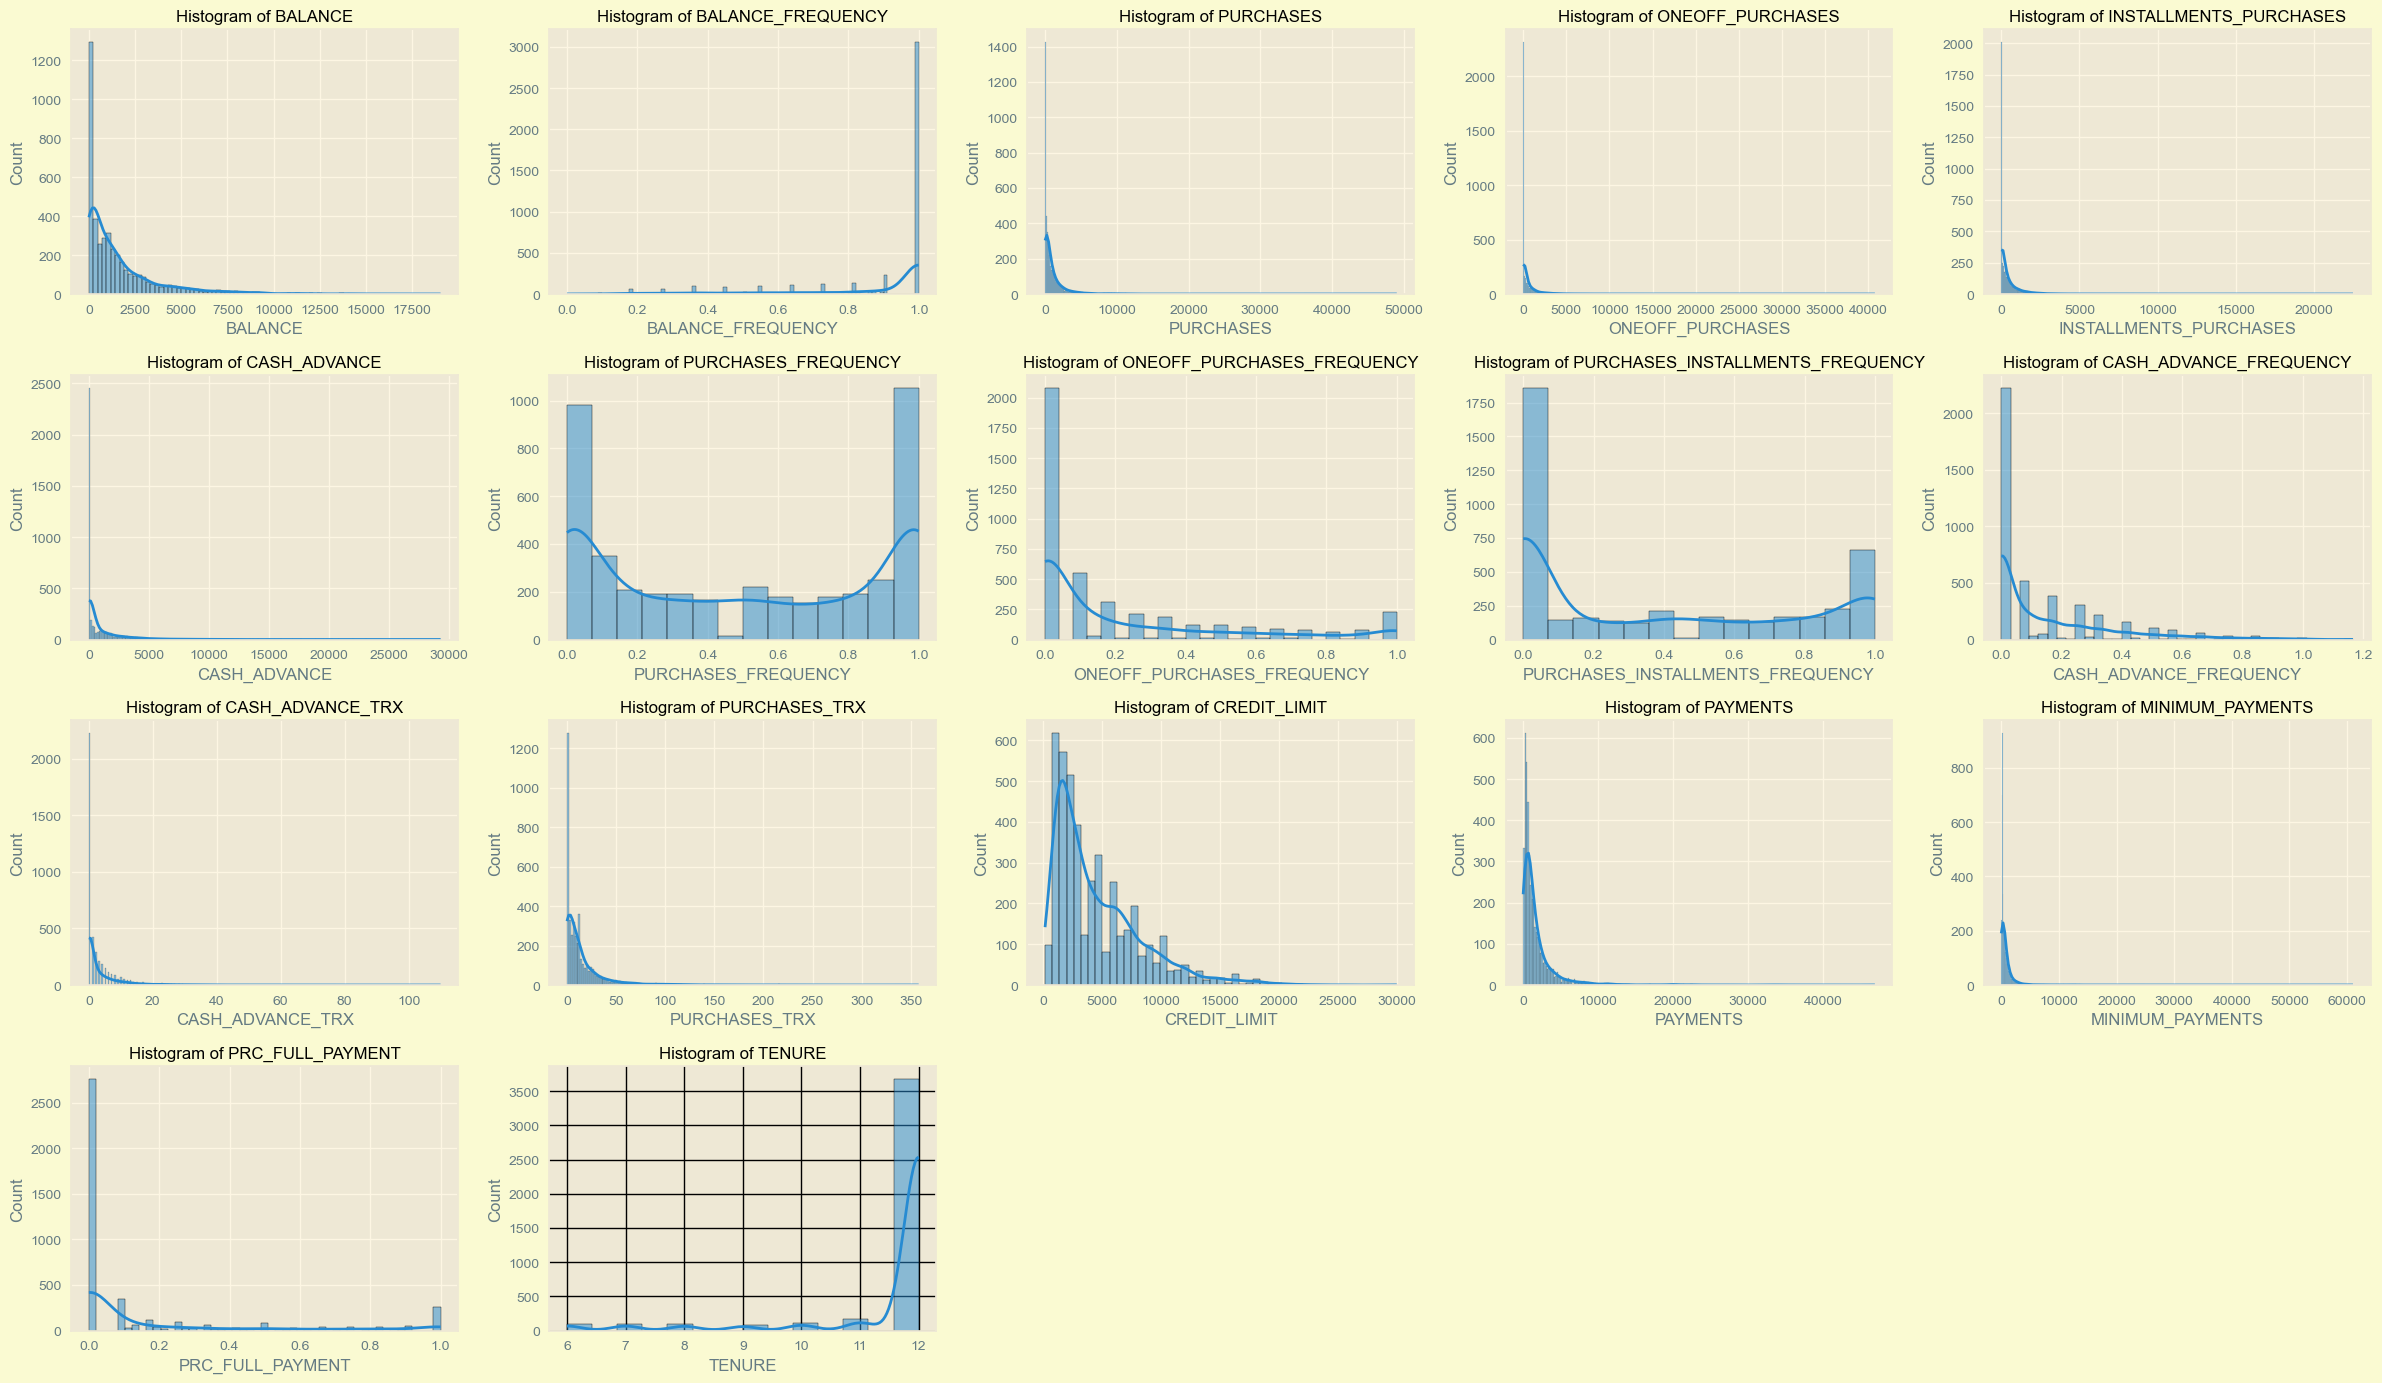

In [13]:
# Create a 24x14 plot
plt.figure(figsize=(24, 14))

# Create a plot with dark background
plt.style.use('Solarize_Light2')

# Iterate through each numeric column in 'data_num'
for i, col in enumerate(data_visualization.columns, 1):
     # Create a subplot with a size of 4 rows x 5 columns and take the i-th subplot number
     plt.subplot(4, 5, i)
    
     # Create histograms and KDE plots using seaborn for the current numeric column
     sns.histplot(data_visualization[col], kde=True)
    
     # Add a title for each subplot based on the column name
     plt.title(f'Histogram of {col}', color='black', fontsize=12)  # Set title color to black

# Set the background color outside the plot area
plt.gcf().patch.set_facecolor('lightgoldenrodyellow')  # Set background color to Solarize_Light2

# Set the color of the grid lines
plt.grid(color='black')

# Set the color of annotations, x-axis, and y-axis labels
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Adjust the subplot layout to make it neater
plt.tight_layout()

# Displays the plot
plt.show()

From looking at the description of the dataset we have, we know that **many columns have non-normal data distribution.**

Apart from that, looking at the skewness (slope of the data), there are **several columns that have extreme levels of skewness.**

### 5.2 Seeing a comparison of customer behavior in using credit

We want to see how customers behave in using their credit, whether with cash withdrawals, one-time payments or installments.

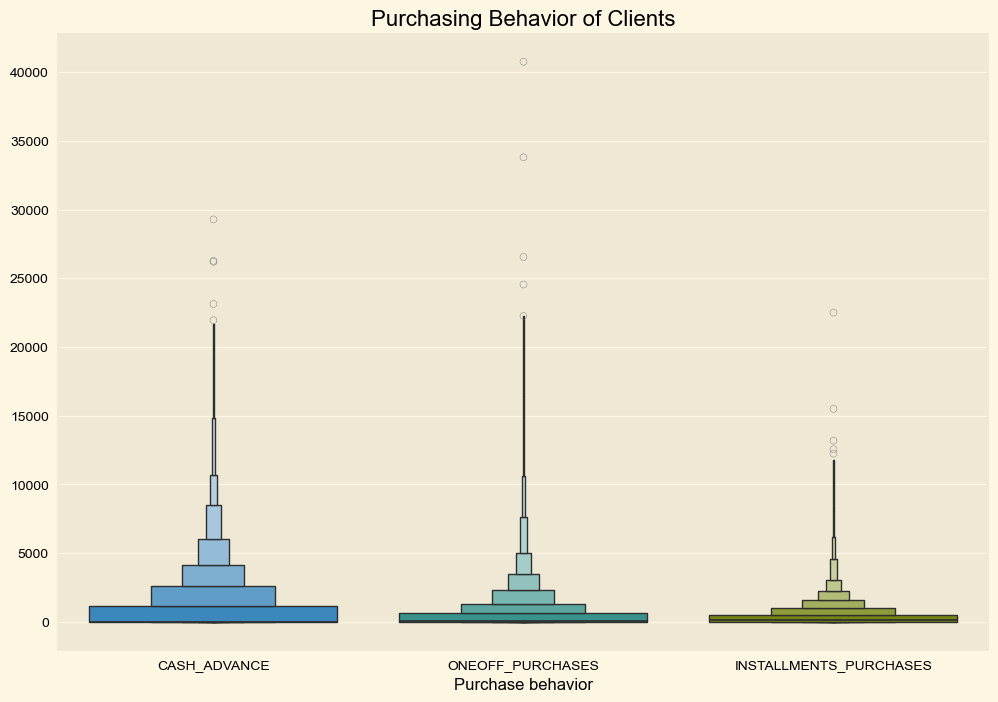

In [14]:
# Create a plot with size 12x8
plt.figure(figsize=(12, 8))

# Create a boxen plot using seaborn for columns 'CASH_ADVANCE', 'ONEOFF_PURCHASES', and 'INSTALLMENTS_PURCHASES'
sns.boxenplot(data=data_visualization[['CASH_ADVANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']])

# Add x-axis labels with the caption 'Purchase behaviors'
plt.xlabel('Purchase behavior')

# Added a plot title with the caption 'Purchasing Behavior of Clients'
plt.title('Purchasing Behavior of Clients')

# Displays the plot
plt.show()

From the visualization results above, we find that **many customers withdraw funds from credit rather than making payments.**

In addition, we also find that **more people use their credit to make one-time purchases rather than installment purchases.**

This may happen because **more people use credit to obtain its benefits rather than because of their financial situation.**

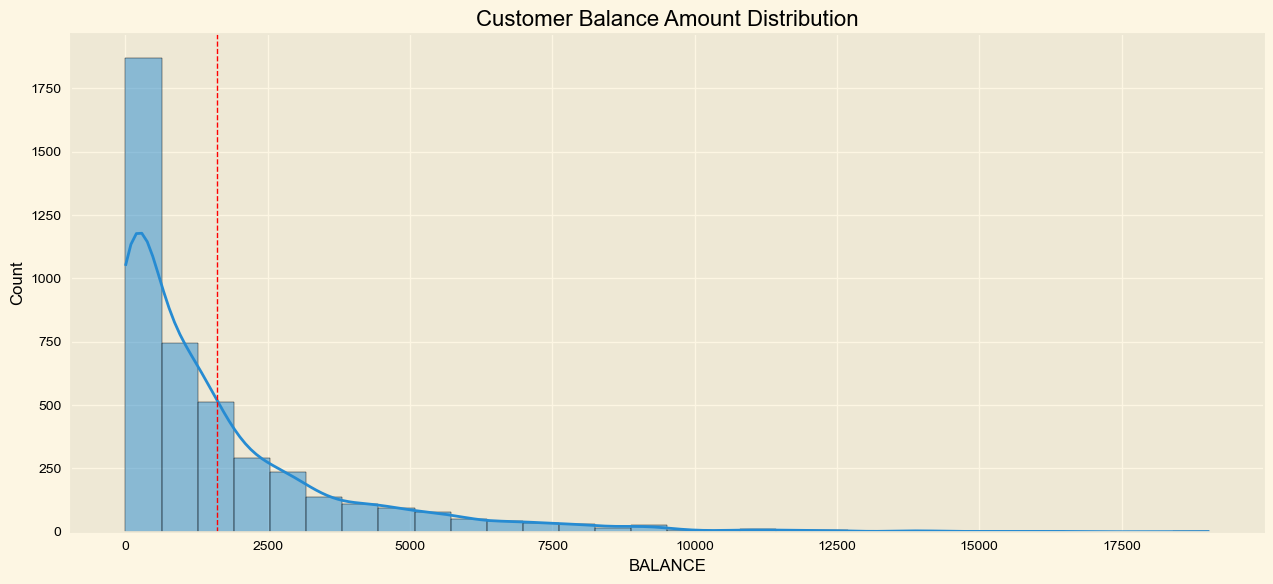

In [15]:
# Create a plot with size 14x6
plt.figure(figsize=(25, 6))

# Create a subplot with 1 row and 2 columns, and retrieve the first subplot
plt.subplot(1, 2, 1)

# Create a histogram using seaborn for distribution of customer balances
sns.histplot(data_visualization['BALANCE'], bins=30, kde=True)

# Added a subplot title with the caption 'Distribution of Customer Balance Amount'
plt.title('Customer Balance Amount Distribution')

# Add a dashed line
plt.axvline(x=data_visualization['BALANCE'].mean(), color='red', linestyle='dashed', linewidth=1)

# Adjust the subplot layout to make it neater
plt.tight_layout()

# Displays the plot
plt.show()

From the visualization results, we find that there are many customers who have small balances in their accounts, namely up to 2000 customers. Apart from that, the average customer balance is around 2000.

This amount is considered very significant compared to those who have more balances afterwards.

### 5.3 Comparison of Purchases with Purchase Frequency

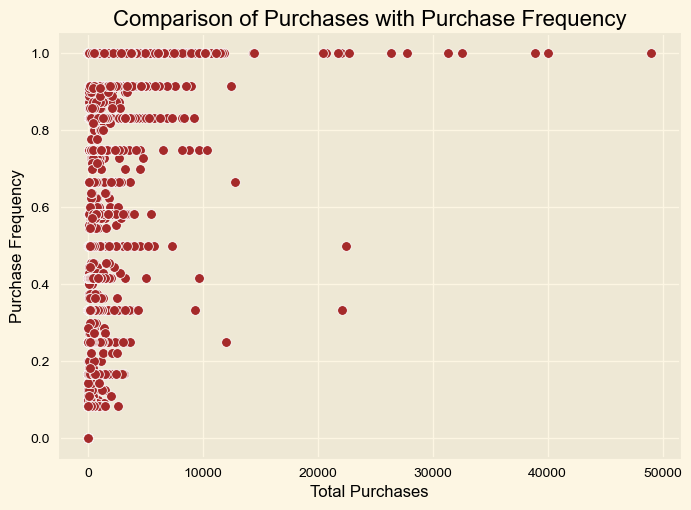

In [16]:
# Define the scatterplot color
brown_color = '#8B4513'

# Create a scatter plot using seaborn to compare the number of purchases with the frequency of purchases
sns.scatterplot(x='PURCHASES', y='PURCHASES_FREQUENCY', data=data_visualization, color='Brown')  # Use the 'deep' palette

# Add x-axis labels with the caption 'Total Purchases'
plt.xlabel('Total Purchases')

# Add a y-axis label with the caption 'Purchase Frequency'
plt.ylabel('Purchase Frequency')

# Added a plot title with the caption 'Comparison of Purchases with Purchase Frequency'
plt.title('Comparison of Purchases with Purchase Frequency')

# Displays the plot
plt.show()  

We can find several anomalies in this data.

### 5.4 Comparison of Cash Withdrawals with Frequency of Cash Withdrawals

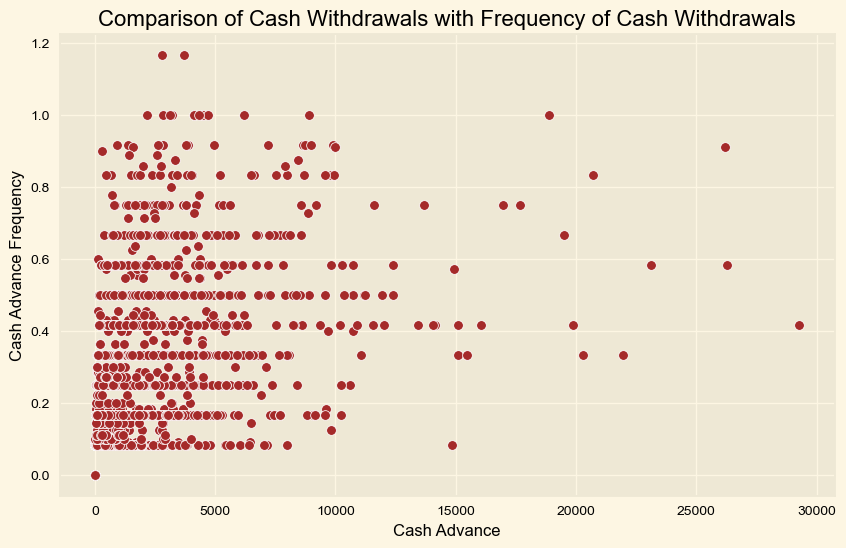

In [17]:
# Create a scatter plot between 'CASH_ADVANCE' and 'CASH_ADVANCE_FREQUENCY'
plt.figure(figsize=(10, 6))

# Define the scatterplot color
brown_color = '#8B4513'

# Create a scatter plot using seaborn to compare the amount of cash taken with the frequency of cash taken
sns.scatterplot(x='CASH_ADVANCE', y='CASH_ADVANCE_FREQUENCY', data=data_visualization, color='Brown')

# Add x-axis labels with the caption 'Cash Advance'
plt.xlabel('Cash Advance')

# Add a y-axis label with the caption 'Cash Advance Frequency'
plt.ylabel('Cash Advance Frequency')

# Added a plot title with the caption 'Comparison of Cash Withdrawals with Frequency of Cash Withdrawals'
plt.title('Comparison of Cash Withdrawals with Frequency of Cash Withdrawals')

# Displays the plot
plt.show()

We can find several anomalies in this data.

### 5.5 Tenure Distribution

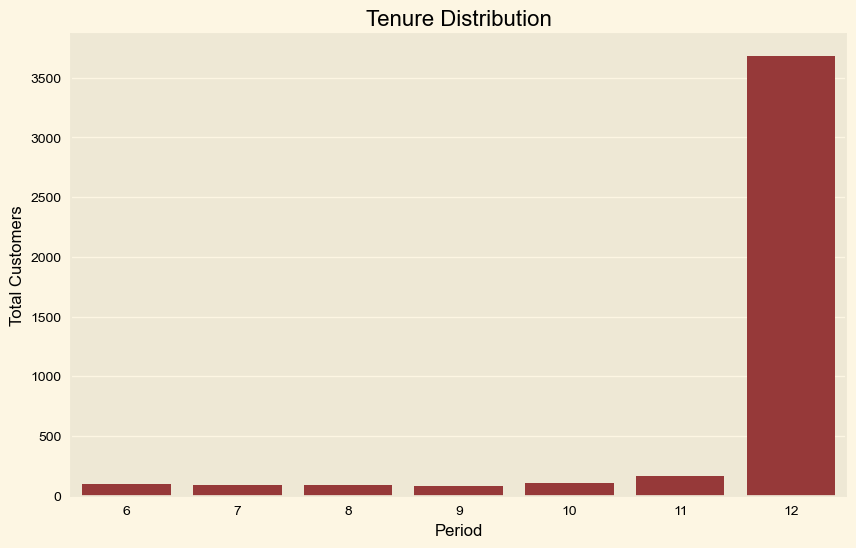

In [18]:
# Create a plot with size 10x6
plt.figure(figsize=(10, 6))

# Create a count plot using seaborn for TENURE distribution
sns.countplot(x='TENURE', data=data_visualization, color='Brown')

# Added a plot title with the caption 'Tenure Distribution'
plt.title('Tenure Distribution')

# Added x-axis labels with 'Period' caption
plt.xlabel('Period')

# Add a y-axis label with the caption 'Total Customers'
plt.ylabel('Total Customers')

# Displays the plot
plt.show()

From the visualization above, we find that the **12 month tenure is the one most often taken by customers**. The number is very significant compared to the others.

## 6. Feature Engineering

This section contains the data preparation process for the model training process, such as dividing data into train-test, data transformation (normalization, encoding, etc.), and other necessary processes.

Before going any further, let's copy the data that we will use in building the model. This is done to avoid things that we don't want in the original data. The data that has been previously loaded will be entered into a new variable where the data in that variable will be processed

In [19]:
# copy the original data set
df = data.copy()

After copying the data into a new variable, we will create a variable containing features that will be used for the clustering model where the features are numeric type columns.

In [20]:
df = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']]

print(df.shape)

(4316, 17)


---
### 6.1 Handling Outlier

To deal with outliers, we will first look at the numeric column visualization to see if the numeric data has any outliers.  ***the columns that will be checked are only the 'CUST_ID', 'BALANCE',  'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE' columns.***

First, We will use box plots to visualize the distribution of numerical data . This is done to see the actual information from the column so that we can find out whether there are outliers in the column

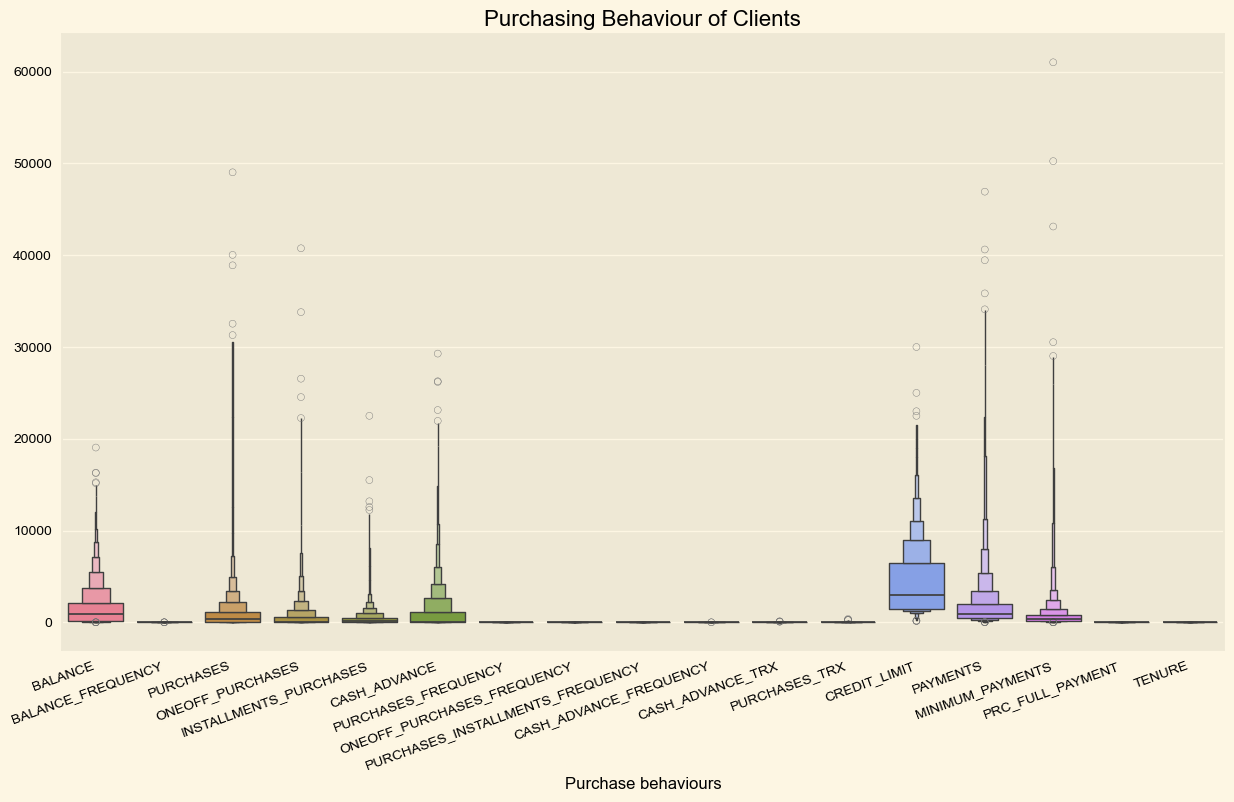

In [21]:
# Membuat boxplot sebelum penanganan outlier
plt.figure(figsize=(15, 8))

# Membuat boxen plot menggunakan seaborn dengan data yang diberikan
ax = sns.boxenplot(data=df)

# Menyesuaikan label sumbu x agar miring dengan rotasi 45 derajat dan penyesuaian horizontal ke kanan
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')

# Menambahkan label pada sumbu x
plt.xlabel('Purchase behaviours')

# Menambahkan judul plot
plt.title('Purchasing Behaviour of Clients')

# Menampilkan plot
plt.show()

From the visualization above, we can see that there are outliers in the all numeric column. Apart from looking at the visualization, we will ensure there are outliers based on the distribution. We will make calculations to find out the distribution of the columns

In [22]:
# Create function to search the skew value, upper and lower boundaries, and outlier flag
def outlier_analysis(data):

    # create the dataframe and empty lists
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    has_outliers = []  # New list to indicate if a column has outliers

    # Loop for the column
    for col in data.columns:
        col_name.append(col)

        # Calculate Skewness
        skew_val = data[col].skew()
        skew.append(skew_val)

        # Highly Skewed Upper and Lower Boundaries
        if skew_val > 1 or skew_val < -1:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)

        # Moderatly Skewed
        elif skew_val > 0.5 or skew_val < -0.5:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)

        # Normal Distribution
        else :
            std = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
        
        # Append the upper and lower value
        upper.append(upper_boundary)
        lower.append(lower_boundary)

        # Check for outliers
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))
    
    # Add into the dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has_outliers'] = has_outliers  # Add the has_outliers column

    return result


After making calculations to find out the distribution of data in the column, we will use these calculations in numeric column to find out the distribution. Based on domain knowledge,There are several things that are needed in handling outliers in this dataset.

-  information in the **'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', and 'PURCHASES_INSTALLMENTS_FREQUENCY'** columns is categorical even though it is in numerical form. 
- information in **'BALANCE' and 'CREDIT_LIMIT'** column are natural and logical outliers.
- The columns **'PRC_FULL_PAYMENT' and 'TENURE'**  do not contain outliers

Therefore, these columns will not be handled with outlier handling.

In [23]:
# Select the data except categorical and target columns
outlier_check = df[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                   'PAYMENTS', 'MINIMUM_PAYMENTS']]

# Check the data skewness and boundaries
outlier_analysis(outlier_check)

,columns,skewness,upper boundary,lower boundary,has_outliers
0,PURCHASES,8.902272,4465.772500,-3271.170000,True
1,ONEOFF_PURCHASES,10.045515,2400.000000,-1800.000000,True
2,INSTALLMENTS_PURCHASES,8.030305,1994.370000,-1495.777500,True
3,CASH_ADVANCE,4.713175,4440.994105,-3330.745579,True
4,PAYMENTS,5.987445,6535.835019,-4153.040854,True
5,MINIMUM_PAYMENTS,12.356758,2812.991433,-1812.456014,True


By looking at the visualization images and statistical calculations, we can confirm that all column we have contains outliers. Because the skewness value is more than 0.5, which means the data distribution is not normal, ***the method used is the capping method using the Interquartile Range (IQR)***. To overcome outliers in the data, we will use the winsorizer technique.

**Winsorizer** is a technique in statistics that is used to ***overcome outliers in data by replacing extreme values with less extreme values***, namely by using values that lie at certain percentiles of the data distribution. ***We use winsorizer because outliers in the data can significantly impact statistical analysis and model results***.

In [24]:
# Capping the skewed distribution
winsoriser_fare = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['PURCHASES', 'ONEOFF_PURCHASES', 
                         'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS'])

df = winsoriser_fare.fit_transform(df)

We will re-visualize the data that we have handled outliers to reveal.

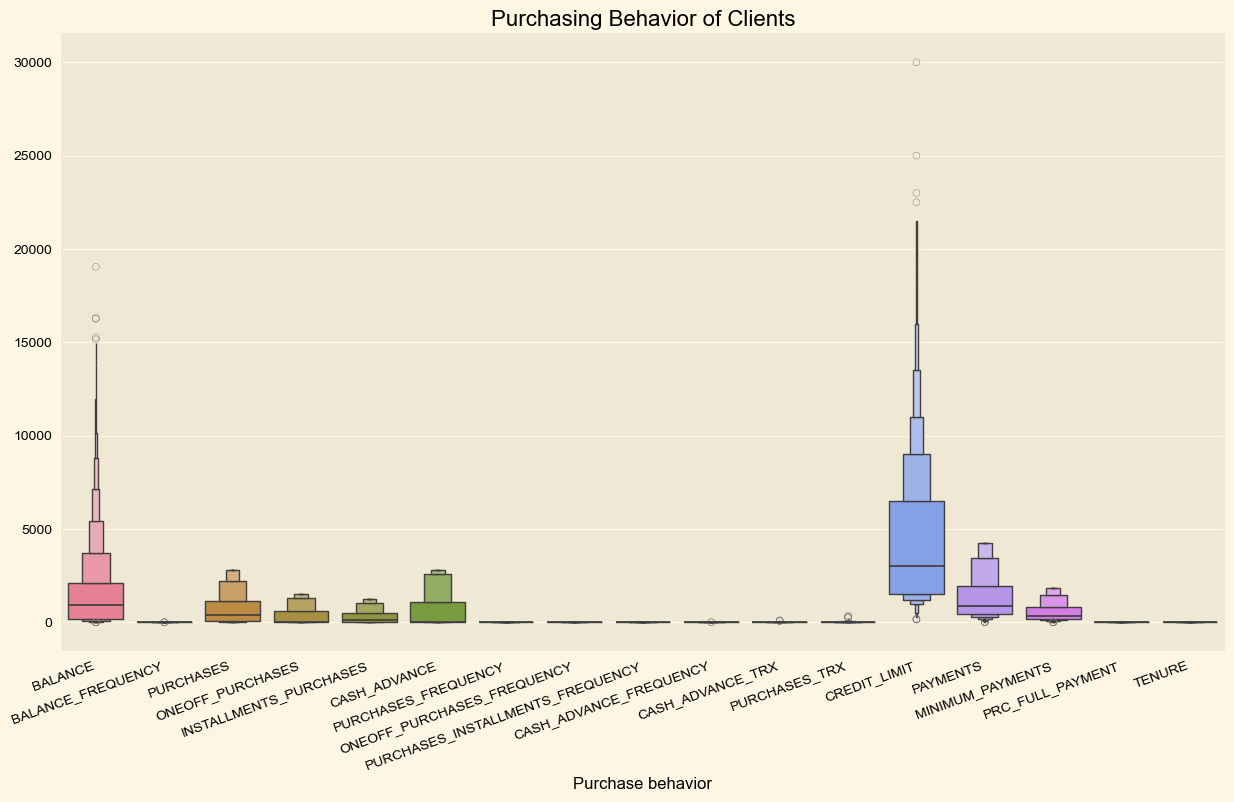

In [25]:
# Create a boxplot before handling outliers
plt.figure(figsize=(15, 8))

# Create a boxen plot using seaborn with the given data
ax = sns.boxenplot(data=df)

# Adjusts the x-axis labels to tilt with a 45 degree rotation and a horizontal adjustment to the right
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')

# Add labels to the x-axis
plt.xlabel('Purchase behavior')

# Added plot title
plt.title('Purchasing Behavior of Clients')

# Displays the plot
plt.show()

### 6.2 Scalling

Before doing PCA or dimensional reduction, we need to scale the numerical data. Because we will need original data to be implemented with an optimal model, we will create a new dataframe that has not been scaled or encoded.

In [26]:
data_duplicate = df.copy()

It is important to scale the data using StandardScaler because **PCA is very sensitive to scale differences between variables** where it attempts to maintain maximum variance in the data.

**Using StandardScaler, we make each variable have a mean of zero and a standard deviation of one.** This ensures that all variables are on a similar scale, so that PCA can work more effectively in extracting important patterns and information from the data.

In [27]:
# Define the Scaling method
scaler = StandardScaler()

# Fit dan transform data untuk melakukan Standard Scaling pada semua kolom
data_duplicate[data_duplicate.columns] = scaler.fit_transform(data_duplicate[data_duplicate.columns])

We print the scale results again to see our dataset after scaling

In [28]:
data_duplicate

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,-0.311580,-0.097897,-0.731066,-0.499159,-0.746660,-0.669386,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.955537,-0.918190,-0.292201,-0.543930,-2.666446
3,-0.540390,0.506828,-0.195703,0.413265,-0.746660,-0.669386,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.955537,-0.884745,-0.757683,-0.543930,-2.666446
4,-0.259370,0.506828,0.765062,2.050707,-0.746660,-0.669386,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.819978,-0.775845,-0.621977,-0.543930,-2.666446
5,0.302369,0.506828,-0.712184,-0.466978,-0.746660,-0.669386,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.548860,-0.818124,0.251909,-0.543930,-2.666446
7,-0.557694,-2.516796,0.487384,1.577458,-0.746660,-0.669386,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.901314,-1.041970,-0.928517,-0.543930,-2.666446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,-0.247309,0.506828,-0.845469,-0.694138,-0.746660,0.602659,-1.240685,-0.686616,-0.928760,2.041122,0.874003,-0.604891,-0.901314,-0.006388,-0.542436,-0.240562,-0.401314
4471,-0.375174,0.067029,-0.845469,-0.694138,-0.746660,2.133721,-1.240685,-0.686616,-0.928760,2.041122,0.569867,-0.604891,-0.101515,2.237838,-0.595892,-0.240562,-0.401314
4472,0.847788,0.506828,-0.222383,0.114588,-0.426633,1.358653,1.262334,1.743970,-0.015494,2.041122,0.874003,0.212424,1.511638,-0.273148,0.563199,-0.543930,-0.401314
4473,1.537860,0.506828,0.927148,2.145357,-0.746660,2.133721,-0.102950,0.832498,-0.928760,2.041122,2.090546,0.416753,0.400053,-0.377426,2.246375,-0.240562,-0.401314


Looking at the table above, we have succeeded in scaling our dataset

### 6.3 Dimensionality Reduction: Principal Component Analysis (PCA)

Before doing clustering, we will carry out dimension reduction using PCA because we have a lot of features and it is possible to get better grouping results.

In [29]:
pca = PCA()
pca.fit(data_duplicate)

PCA()

After carrying out PCA, we will visualize the ratio between many features with the percent understanding of the overall data and visualize the eigen values.

Text(0, 0.5, 'Eigenvalues')

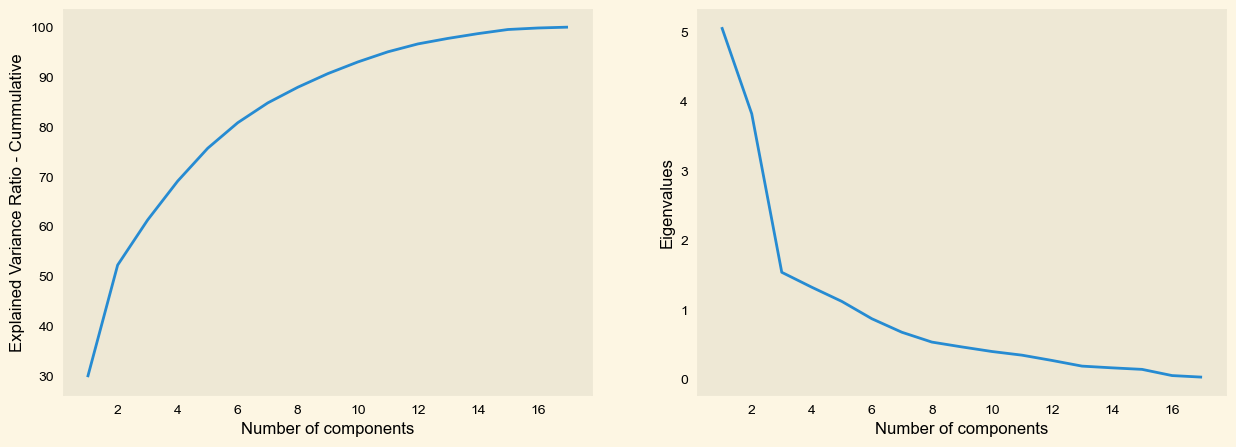

In [30]:
# Cumulative Plot of Explained Variance Ratio
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.grid()
plt.plot(range(1,18),np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Eigenvalue Plot
plt.subplot(1,2,2)
plt.grid()
plt.plot(range(1,18),pca.explained_variance_)
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

From the plot results, if we use **2 columns out of 17 columns**, we will only **get +50%** of the information from the total data. However, if we use **11 of the 17 columns**, we get information as much as **95% or more** of the total data.

If we want 90-95% understanding of the data, we can choose between 11-14 columns. Next we will find out how many columns we need if we want to get at least 95% of the information from the total data.

In [31]:
# Check the number of features if we want to keep 95% of the information
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

11

From the query syntax above, we find that from the initial 17 columns, we can reduce the dimensions to 11 columns while maintaining information understanding above 95%.

In [32]:
# Let's train the model with 95% information of the original dataset
pca = PCA(n_components=0.95)
pca.fit(data_duplicate)

data_duplicate_scaled_pca = pca.transform(data_duplicate)

## 7. Model Definition

Next we will define the K-Means model that we will use. **K-Means is a centroid-based clustering algorithm that aims to partition a data set into K distinct, non-overlapping clusters (hard clustering).** Several parameters used in this k-means model are:

- n_cluster = 5 (The number of clusters to form as well as the number of centroids to generate.)
- n_init = 10 (Number of times the k-means algorithm is run with different centroid seeds.)
- max_iter = 300 (Maximum number of iterations of the k-means algorithm for a single run.)
- random_state = 22 (Determines random number generation for centroid initialization.)

In [33]:
# Define Model
km = KMeans(n_clusters = 5,
            init = 'k-means++',
            max_iter = 300,
            n_init = 10,
            random_state = 22)

## 8. Model Training

Next, we will train our K-Means model on data that has been scaled and PCA.

In [34]:
# Model Training on X_scaled_pca data
km.fit(data_duplicate_scaled_pca)

KMeans(n_clusters=5, n_init=10, random_state=22)

## 9. Model Evaluation

### 9.1 Find the Optimal Number of Clusters
Next we will find out how many clusters we need. To find out, we will try to find the optimal number of clusters between 2 clusters to 15 clusters.

We will determine this by using the elbow, silhouette and yellowbrick methods.

In [35]:
inertias=[]
sil_scores=[]
K=[n for n in range(2,15)]
for k in K:
    kmean_clust=KMeans(n_clusters=k).fit(data_duplicate_scaled_pca)
    inertias.append(kmean_clust.inertia_)
    sil_scores.append(silhouette_score(data_duplicate_scaled_pca,kmean_clust.labels_))

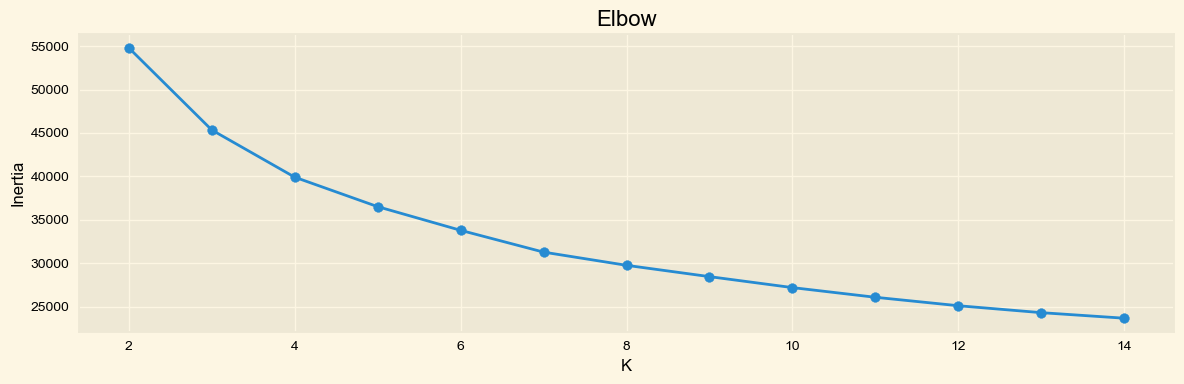

In [36]:
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(K,inertias)
ax.scatter(K,inertias)
ax.set_xlabel('K')
ax.set_ylabel('Inertia')
ax.set_title('Elbow')


plt.tight_layout()

If you look at the visualization using the elbow method above, **the number 3 or 4 can be chosen for cluster division.** This is because quite significant changes in values can be seen at these two points. To be sure, a silhouette score search will be carried out, as well as creating a silhouette plot and a cluster visualization plot.

For n_clusters = 2 The average silhouette_score is : 0.25637946560051816
For n_clusters = 3 The average silhouette_score is : 0.22981623067228485
For n_clusters = 4 The average silhouette_score is : 0.20497303689558194
For n_clusters = 5 The average silhouette_score is : 0.2119541373592431
For n_clusters = 6 The average silhouette_score is : 0.21602261184847643
For n_clusters = 7 The average silhouette_score is : 0.22795045688702023
For n_clusters = 8 The average silhouette_score is : 0.21803418708972544
For n_clusters = 9 The average silhouette_score is : 0.2202944127003264
For n_clusters = 10 The average silhouette_score is : 0.1995924407667684
For n_clusters = 11 The average silhouette_score is : 0.20256087087100796
For n_clusters = 12 The average silhouette_score is : 0.2020376192550521
For n_clusters = 13 The average silhouette_score is : 0.206116515287694
For n_clusters = 14 The average silhouette_score is : 0.19964738635614646
For n_clusters = 15 The average silhouette_score is 

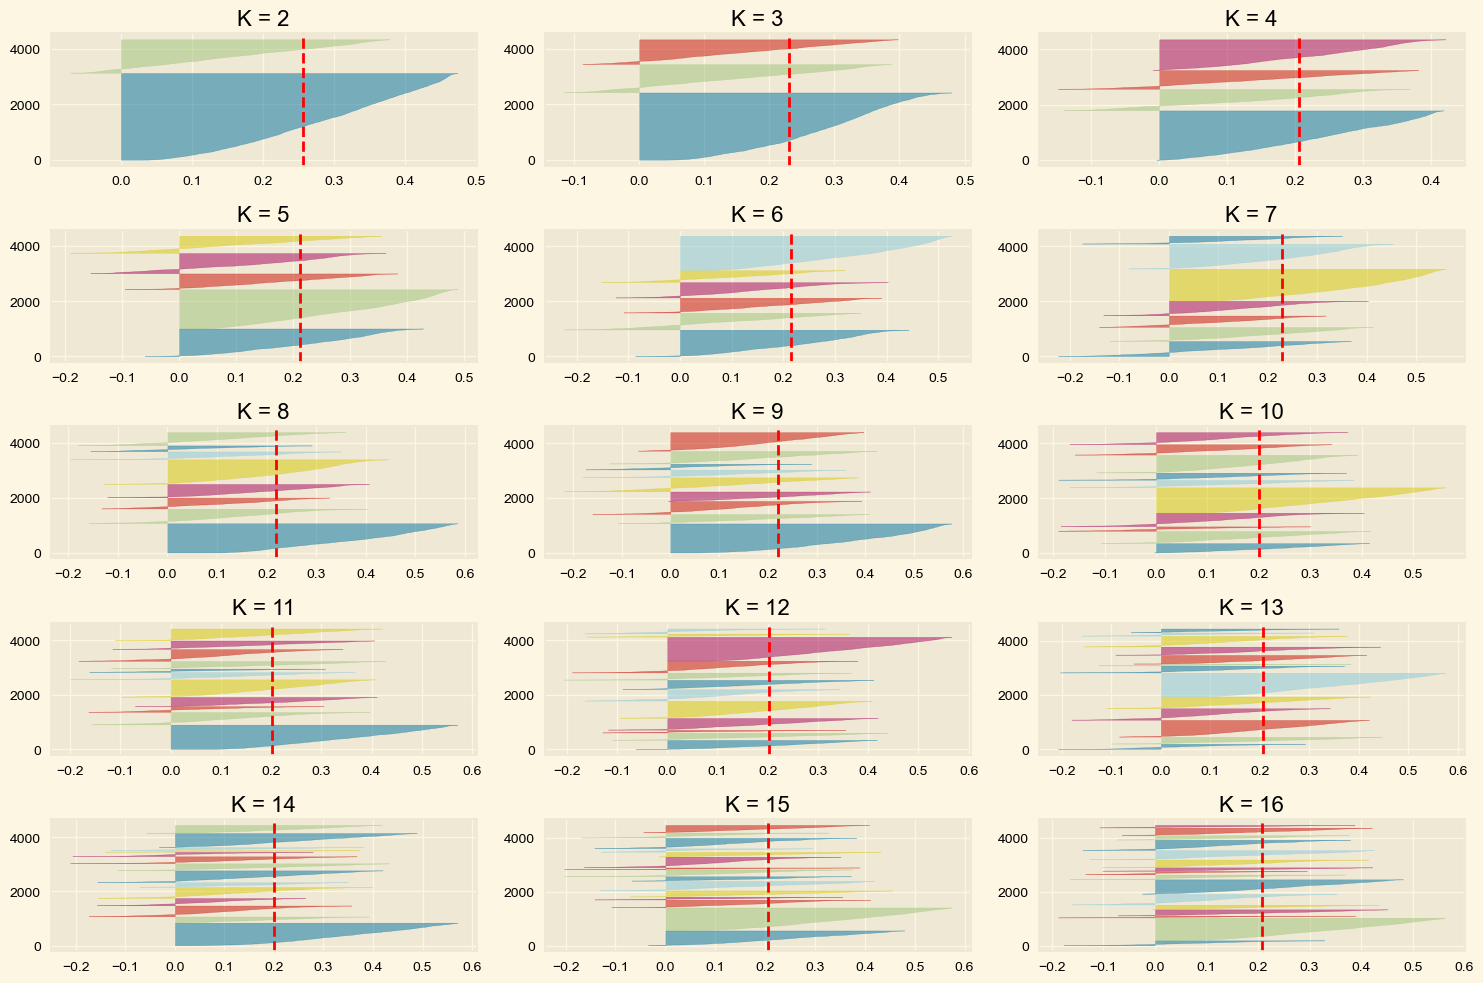

In [37]:
fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):
    n_clusters = i + 2
    
    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 22)
    cluster_labels = clusterer.fit_predict(data_duplicate_scaled_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(data_duplicate_scaled_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 22)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(data_duplicate_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

When we look at the sillhoute score visualization, we know that the **closer the sillhoute score value is to 1, the better the model is at performing clustering.** Based on the sillhoute and elbow score visualization, we get several conclusions, namely:

- the more clusters there are, the smaller the inertia.

- Although n_cluster=2 produces the highest silhouette score, the data distribution in each cluster appears to be unbalanced.

- n_cluster=3 shows the second highest silhouette after n_cluster = 2. Apart from that, the silouette score visualization results provide a good visualization where the tail is not too long and not too many.

Therefore, it can be concluded that based on the Silhouette Plot, the optimal number of clusters is **n_clusters=3.**

### 9.2 Optimal Model - Model Definition

We will redefine the best model (optimal)

In [38]:
km_optimal_model = KMeans(n_clusters = 3,
            init = 'k-means++',
            max_iter = 300,
            n_init = 10,
            random_state = 22)

### 9.3 Optimal Model - Model Predict

Then we will run predict from our optimal model.

In [39]:
# Train with optimal number of clusters
pred = km_optimal_model.fit_predict(data_duplicate_scaled_pca)
pred

array([0, 0, 0, ..., 2, 2, 2])

### 9.4 Optimal Model - Model Performance

In [40]:
# WCSS and Silhouette of final model

silhouette_final = silhouette_score(data_duplicate_scaled_pca, pred)

final_model_report = {
    'n_components': pca.n_components_,
    'n_cluster': km_optimal_model.n_clusters,
    'wcss': km_optimal_model.inertia_,
    'silhouette_score': silhouette_final
}
final_model_report

{'n_components': 11,
 'n_cluster': 3,
 'wcss': 45344.97898054981,
 'silhouette_score': 0.22981623067228485}

From the checking results above, we find that our optimal model has dimensions that only leave 11 columns, has a division of 3 clusters, with an inertia of 45344.98, and a silhouette score value of 0.22 or has an understanding of 22% of the total data.

### 9.5 Optimal Model - Added a new column of cluster results

Next we will add a new column containing the cluster results to the original data.

In [41]:
df['CLUSTER'] = pred
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,0
3,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,0
4,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,0
5,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,0
7,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,2
4471,809.582978,0.909091,0.00,0.00,0.00,2775.621316,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4245.361617,241.645387,0.090909,11,2
4472,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,2
4473,4840.545574,1.000000,1595.93,1500.00,0.00,2775.621316,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,1821.824123,0.090909,11,2


### 9.6 Optimal Model - Visualizing clustering results

<Axes: >

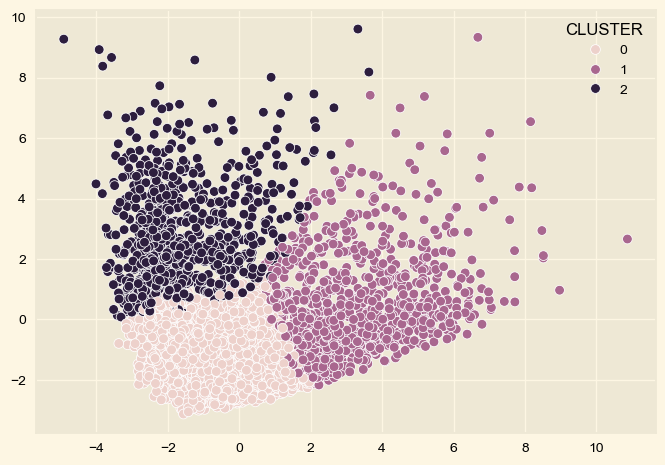

In [42]:
pca_2d = PCA(n_components=2)
pca_2d.fit(data_duplicate_scaled_pca)

data_scaled_pca_2d = pca_2d.fit_transform(data_duplicate_scaled_pca)

sns.scatterplot(x=data_scaled_pca_2d[:,0], y=data_scaled_pca_2d[:,1], hue=df['CLUSTER'])

We find 3 clusters from our data.

- Cluster 0 located at the bottom left has a very high density and is gathered on one side. This cluster also overlaps with 2 other clusters.

- Cluster 1 which is located on the right has a relatively looser density than the other 2 clusters and overlaps with the other 2 clusters.

- Cluster 2 which is located at the top left has high density on one side and looseness in the top corner. This cluster also overlaps with 2 other clusters.

This overlapping cluster is expected to occur because the data is projected onto a 2-dimensional axis. The data may appear very dense in 2D, but it is not necessarily dense in its original dimensions.

## 10. Exploratory Data Analysis (EDA) II

At this stage we will carry out a second understanding of the data that already has classifications/clusters.

### 10.1 Displays overall data

In [43]:
# Displays 10 data samples in the dataset
df.sample(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
1262,3.691925,0.363636,27.99000,27.99,0.00,0.000000,0.083333,0.083333,0.0,0.000000,0,1,6500.0,187.172733,56.066059,0.500000,12,0
2313,24.057927,0.700000,441.78000,49.90,391.88,0.000000,0.900000,0.100000,0.8,0.000000,0,21,1500.0,299.240418,68.453971,0.200000,10,0
1445,793.855972,1.000000,1478.93000,1478.93,0.00,0.000000,0.333333,0.333333,0.0,0.000000,0,10,1200.0,723.959807,474.254444,0.000000,12,0
4378,4107.157763,1.000000,279.71000,279.71,0.00,2775.621316,0.250000,0.250000,0.0,0.416667,8,3,5000.0,4245.361617,1211.424432,0.166667,12,2
3530,7659.191510,1.000000,0.00000,0.00,0.00,1971.469655,0.000000,0.000000,0.0,0.333333,7,0,8000.0,1897.854153,1821.824123,0.000000,12,2
3017,817.059154,0.636364,0.00000,0.00,0.00,2135.758110,0.000000,0.000000,0.0,0.083333,4,0,5500.0,4245.361617,360.414305,0.000000,12,2
880,884.163750,1.000000,823.52000,0.00,823.52,0.000000,1.000000,0.000000,1.0,0.000000,0,56,1500.0,416.870269,294.032386,0.000000,12,0
1309,2138.185971,1.000000,45.65000,45.65,0.00,0.000000,0.083333,0.083333,0.0,0.000000,0,1,2500.0,728.892219,755.461023,0.000000,12,0
907,912.360030,1.000000,2807.85625,1500.00,1019.81,0.000000,1.000000,1.000000,1.0,0.000000,0,49,15000.0,4245.361617,299.249818,1.000000,12,1
4124,4570.048750,1.000000,888.98000,888.98,0.00,1825.929322,0.416667,0.416667,0.0,0.166667,2,7,6000.0,1179.345860,1200.960907,0.000000,12,2


The information above is a sample of 10 data from the dataset

### 10.2 View data by cluster

In [44]:
# Create a new dataframe based on the cluster
data_duplicate_cluster_0 = df[df['CLUSTER']==0]
data_duplicate_cluster_1 = df[df['CLUSTER']==1]
data_duplicate_cluster_2 = df[df['CLUSTER']==2]

## Displays samples from each cluster dataset
print("Sample of Dataset Cluster 0")
display(data_duplicate_cluster_0.sample(3))

print("Sample of Dataset Cluster 1")
display(data_duplicate_cluster_1.sample(3))

print("Sample of Dataset Cluster 2")
display(data_duplicate_cluster_2.sample(3))

Sample of Dataset Cluster 0


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
3428,164.377503,0.900000,0.00,0.00,0.0,470.00055,0.000000,0.000000,0.0,0.3,3,0,9500.0,684.398658,152.648955,0.285714,10,0
1354,158.512412,0.454545,713.64,713.64,0.0,0.00000,0.083333,0.083333,0.0,0.0,0,2,3000.0,1121.322787,96.145734,0.000000,12,0
1398,53.994628,1.000000,257.00,257.00,0.0,0.00000,0.083333,0.083333,0.0,0.0,0,3,6500.0,423.058905,63.502182,0.083333,12,0


Sample of Dataset Cluster 1


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
3263,16259.448570,1.0,2807.85625,1500.00,1246.48125,328.698275,1.000000,0.833333,1.00,0.083333,2,143,18000.0,4245.361617,1821.824123,0.0,12,1
2589,3255.151368,1.0,1771.60000,251.00,1246.48125,1279.568823,0.916667,0.166667,0.75,0.250000,6,15,9000.0,4245.361617,853.911515,0.0,12,1
271,3258.237364,1.0,921.12000,521.14,399.98000,0.000000,0.750000,0.500000,0.50,0.000000,0,14,6200.0,1323.776141,1011.025921,0.0,12,1


Sample of Dataset Cluster 2


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
3659,3765.693221,1.0,0.00,0.0,0.00,1700.400179,0.0,0.0,0.000000,0.454545,8,0,4000.0,745.344919,1821.824123,0.0,11,2
4136,3172.114278,1.0,454.13,0.0,454.13,2775.621316,1.0,0.0,0.888889,0.777778,22,11,4000.0,1746.248986,1091.696320,0.0,9,2
2670,3458.708146,1.0,0.00,0.0,0.00,2775.621316,0.0,0.0,0.000000,0.500000,10,0,6000.0,4245.361617,752.177841,0.1,10,2


The information above is a sample of 10 data from the dataset in each cluster

### 10.3 View comparisons of lots of data based on clusters

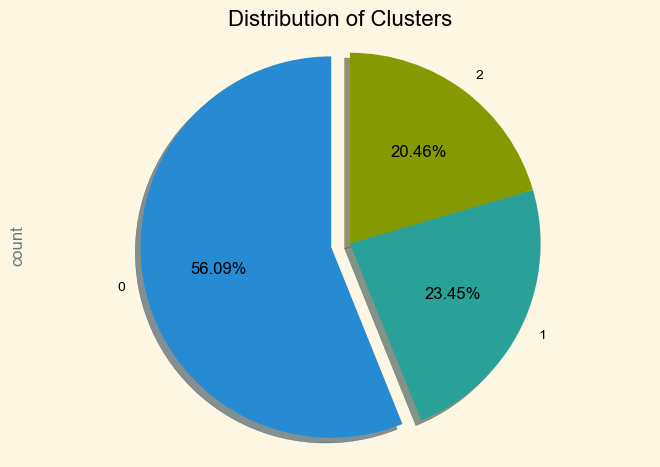

In [45]:
# Create a plot with dark background
plt.style.use('Solarize_Light2')

# Create a pie chart
fig, ax1 = plt.subplots()

# Count the frequency of each 'cab_type' using value_counts()
cluster_counts = df['CLUSTER'].value_counts()
explode = (0.1, 0, 0)  # explode the 1st slice
cluster_counts.plot(kind='pie', autopct='%.2f%%', ax=ax1, shadow=True, explode=explode, startangle=90, textprops={'color':"black"})

# Add a title to the pie chart
plt.title("Distribution of Clusters")

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

# Set background color
ax1.set_facecolor('lightgrey')  # You can change 'dimgray' to any color you prefer

# Display the pie chart
plt.show()

From the visualization results, we find that data with classification category 0 is the most data, namely 56.09% of all data, followed by category 1 (23.45%) and category 2 (20.46%).

### 10.4 View distribution by cluster

In [46]:
print('Cluster 0')
display(data_duplicate_cluster_0.agg(['count', 'skew', 'kurt', 'std', 'mean', 'median', 'min', 'max']).T.sort_values(by='mean'))
print('\n\n')

print('Cluster 1')
display(data_duplicate_cluster_1.agg(['count', 'skew', 'kurt', 'std', 'mean', 'median', 'min', 'max']).T.sort_values(by='mean'))
print('\n\n')

print('Cluster 2')
display(data_duplicate_cluster_2.agg(['count', 'skew', 'kurt', 'std', 'mean', 'median', 'min', 'max']).T.sort_values(by='mean'))
print('\n\n')

Cluster 0


,count,skew,kurt,std,mean,median,min,max
CLUSTER,2421.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE_FREQUENCY,2421.0,1.820604,3.261389,0.106297,0.066889,0.000000,0.000000,0.666667
ONEOFF_PURCHASES_FREQUENCY,2421.0,2.608220,7.563733,0.188669,0.105368,0.000000,0.000000,1.000000
PRC_FULL_PAYMENT,2421.0,1.838729,2.016216,0.300887,0.162742,0.000000,0.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,2421.0,0.692706,-1.101755,0.375211,0.323557,0.166667,0.000000,1.000000
PURCHASES_FREQUENCY,2421.0,0.329695,-1.372994,0.369892,0.430308,0.333333,0.000000,1.000000
BALANCE_FREQUENCY,2421.0,-1.451334,0.846405,0.245996,0.844044,1.000000,0.000000,1.000000
CASH_ADVANCE_TRX,2421.0,2.685300,11.179621,2.020805,1.132590,0.000000,0.000000,23.000000
PURCHASES_TRX,2421.0,1.875856,5.533332,7.800388,7.215613,6.000000,0.000000,56.000000
TENURE,2421.0,-2.753744,6.520360,1.387032,11.475010,12.000000,6.000000,12.000000





Cluster 1


,count,skew,kurt,std,mean,median,min,max
CASH_ADVANCE_FREQUENCY,1012.0,2.608290,7.247386,0.132004,0.063210,0.000000,0.000000,0.833333
PRC_FULL_PAYMENT,1012.0,1.057215,-0.493054,0.363767,0.267520,0.083333,0.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,1012.0,-0.140118,-1.308767,0.345853,0.545539,0.583333,0.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,1012.0,-0.844237,-0.665362,0.349856,0.689266,0.833333,0.000000,1.000000
PURCHASES_FREQUENCY,1012.0,-1.893479,3.164608,0.165477,0.900147,1.000000,0.166667,1.000000
BALANCE_FREQUENCY,1012.0,-3.859530,16.223706,0.095494,0.968698,1.000000,0.363636,1.000000
CLUSTER,1012.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_TRX,1012.0,6.101484,62.193115,4.008140,1.444664,0.000000,0.000000,62.000000
TENURE,1012.0,-6.211360,40.910381,0.701647,11.865613,12.000000,6.000000,12.000000
PURCHASES_TRX,1012.0,2.899600,12.744108,37.078563,42.089921,31.000000,2.000000,358.000000





Cluster 2


,count,skew,kurt,std,mean,median,min,max
PRC_FULL_PAYMENT,883.0,4.307543,24.612256,0.112293,0.043905,0.000000,0.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,883.0,2.603082,7.404202,0.172646,0.090068,0.000000,0.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,883.0,2.021839,2.926951,0.262516,0.130476,0.000000,0.000000,1.000000
PURCHASES_FREQUENCY,883.0,1.347150,0.526251,0.306416,0.211336,0.000000,0.000000,1.000000
CASH_ADVANCE_FREQUENCY,883.0,0.613958,-0.149296,0.226561,0.410066,0.363636,0.000000,1.166667
BALANCE_FREQUENCY,883.0,-3.301667,11.745196,0.126687,0.951398,1.000000,0.181818,1.000000
CLUSTER,883.0,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000
PURCHASES_TRX,883.0,3.545009,20.356602,8.069737,4.327293,0.000000,0.000000,79.000000
CASH_ADVANCE_TRX,883.0,3.153280,17.396958,10.181818,11.137033,9.000000,0.000000,110.000000
TENURE,883.0,-2.314947,4.102734,1.597425,11.303511,12.000000,6.000000,12.000000


Based on the information above, conclusions can be drawn from the dataset in each cluster, namely:

**Cluster 0 :** Basic statistics show significant variation in credit card usage behavior, with data distributions that tend to be asymmetrical and have heavy tails. Purchase frequency indicates users who frequently make purchases, while credit limits and credit card usage periods vary significantly. Use of the cash advance feature was also found to be high, with some users having high credit card balances and use of certain features. Variations in credit limits, balances, and use of certain features were also found among users.

**Cluster 1 :** Basic statistics show significant variation in credit card usage behavior, with some features showing high skewness and kurtosis. Purchase frequency is generally low, while use of the cash advance feature is quite high with a significant average transaction. Additionally, some users have high credit card balances. Considerable variation was seen in credit limits, with some users having limits well above the average. TENURE shows the average credit card usage period is around 11.9 months, with significant variations. In this case, payment processing also shows significant variations.

**Cluster 2 :** Basic statistics show significant variation in credit card usage behavior in this data. High skewness and kurtosis are seen in some features, indicating the presence of asymmetry and heavy tails of the distribution. Purchase frequency is generally low, while use of the cash advance feature tends to be high with a significant average transaction. There is considerable variation in credit limits, with some users having limits well above the average. TENURE shows the average credit card usage period is around 11.3 months, with significant variations. In this case, payment processing also shows significant variations. Additionally, some users had high credit card balances, while overall purchases also showed significant variations.

### 10.5 See the Comparison of Purchases Credit Limits for Each Cluster

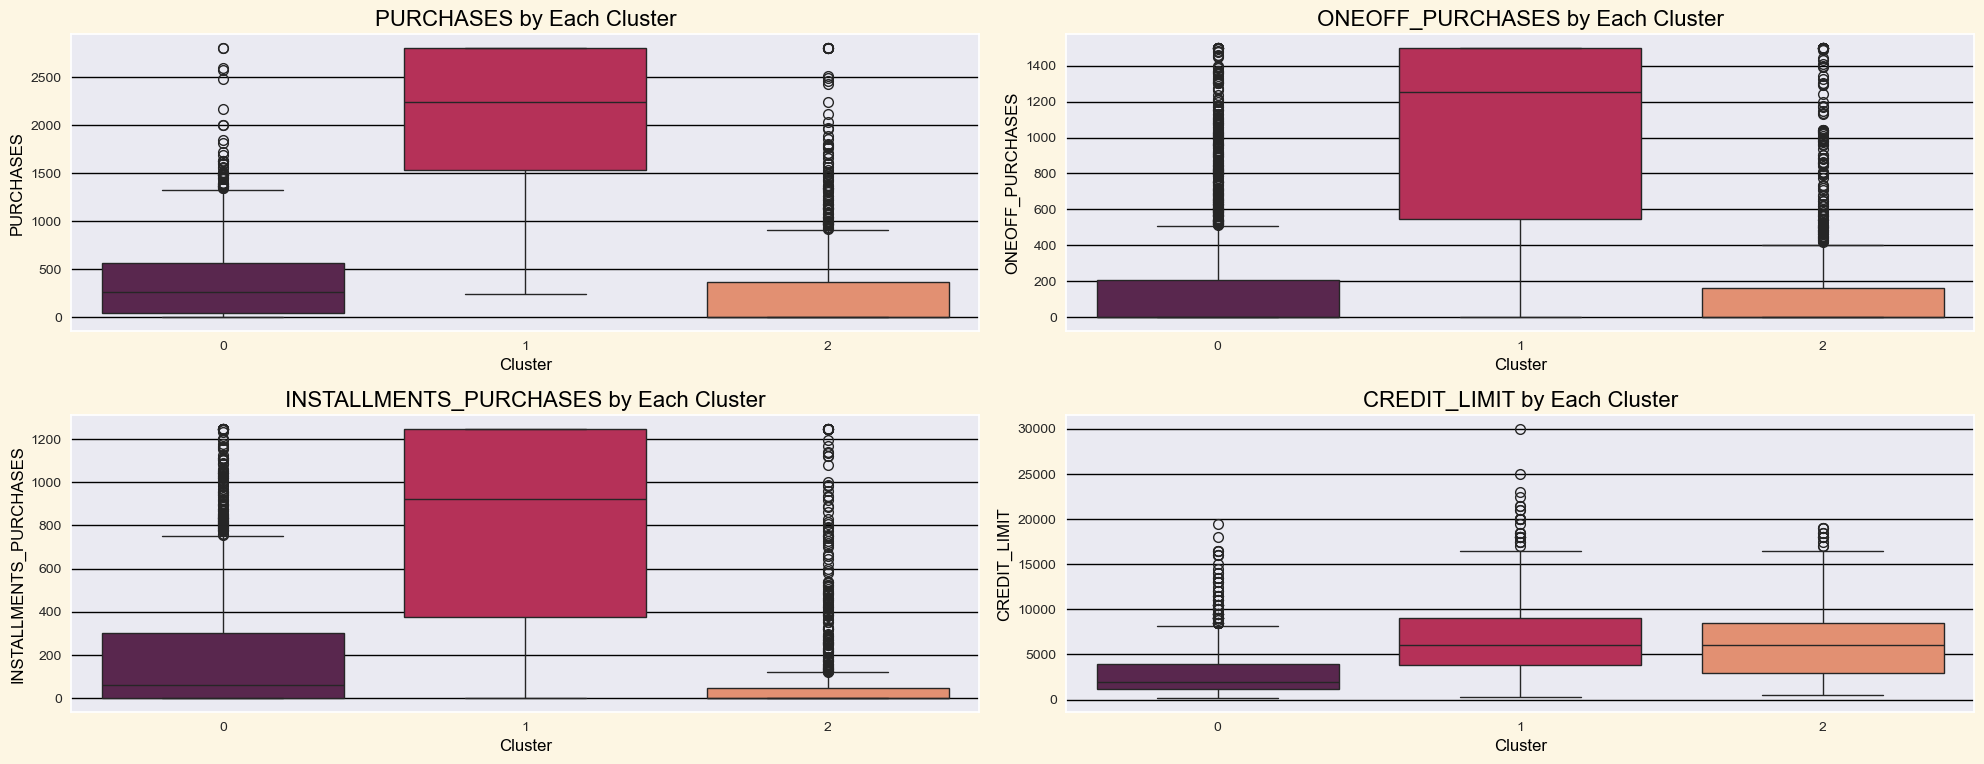

In [47]:
# Purchases by cluster
# List of numeric columns to plot
numeric_columns = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CREDIT_LIMIT']

# Create a plot with dark background
plt.style.use('Solarize_Light2')

# Plot size
plt.figure(figsize=(20, 15))

# Set tema seaborn
sns.set_style("darkgrid", {'grid.color': 'black'})

# Loop through each numeric column
for i, column in enumerate(numeric_columns):
     # Create a subplot for each numeric column against 'CLUSTER'
     plt.subplot(4, 2, i+1)
     sns.boxplot(x='CLUSTER', y=column, data=df, palette='rocket', color='black')
     plt.title(f'{column} by Each Cluster', color='black')
     plt.xlabel('Cluster', color='black')
     plt.ylabel(column, color='black')

# Adjust the subplot layout to make it neater
plt.tight_layout()
plt.show()

The visualization above is a comparison of the purchase credit limits for each cluster, where there are variations in each cluster

### 10.6 See the Balance Comparison of Each Cluster

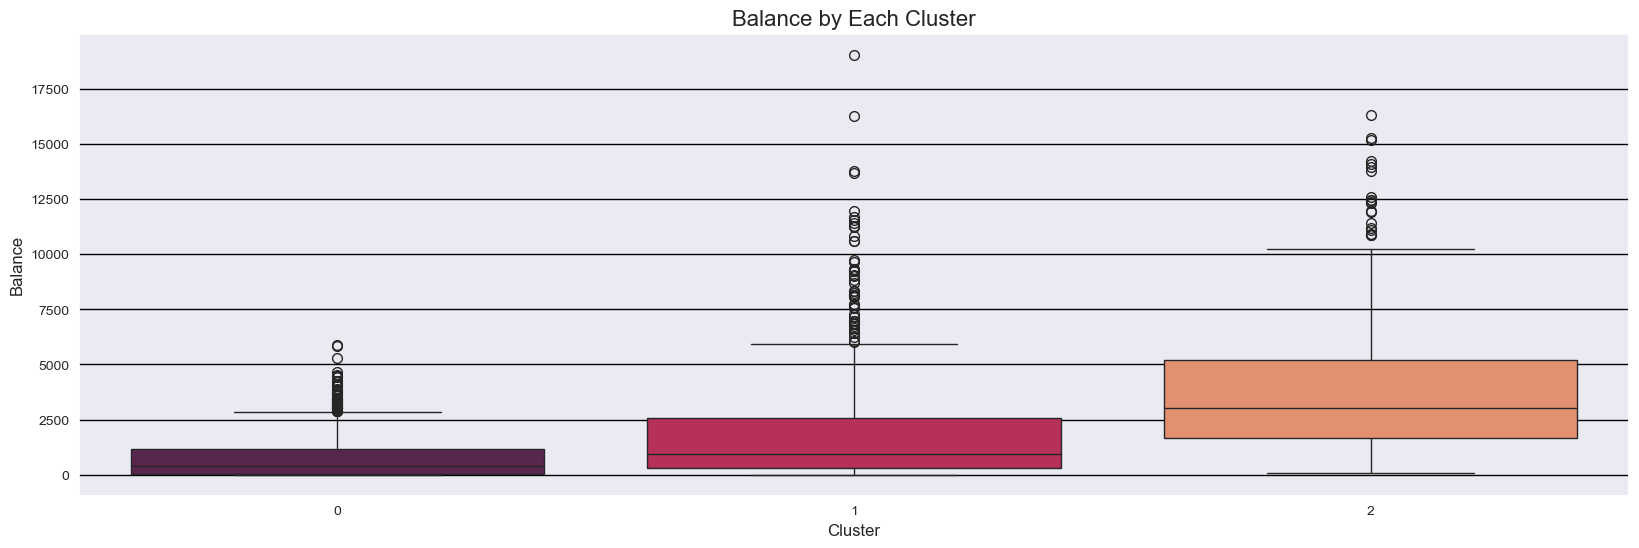

In [48]:
# Balance by cluster
plt.figure(figsize=(20, 6))
sns.boxplot(x='CLUSTER', y='BALANCE', data=df, palette='rocket')
plt.title('Balance by Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.show()

The visualization above is a Comparison of Balances for Each Cluster , where there are variations in each cluster

### 10.7 See the comparison of payments for each cluster

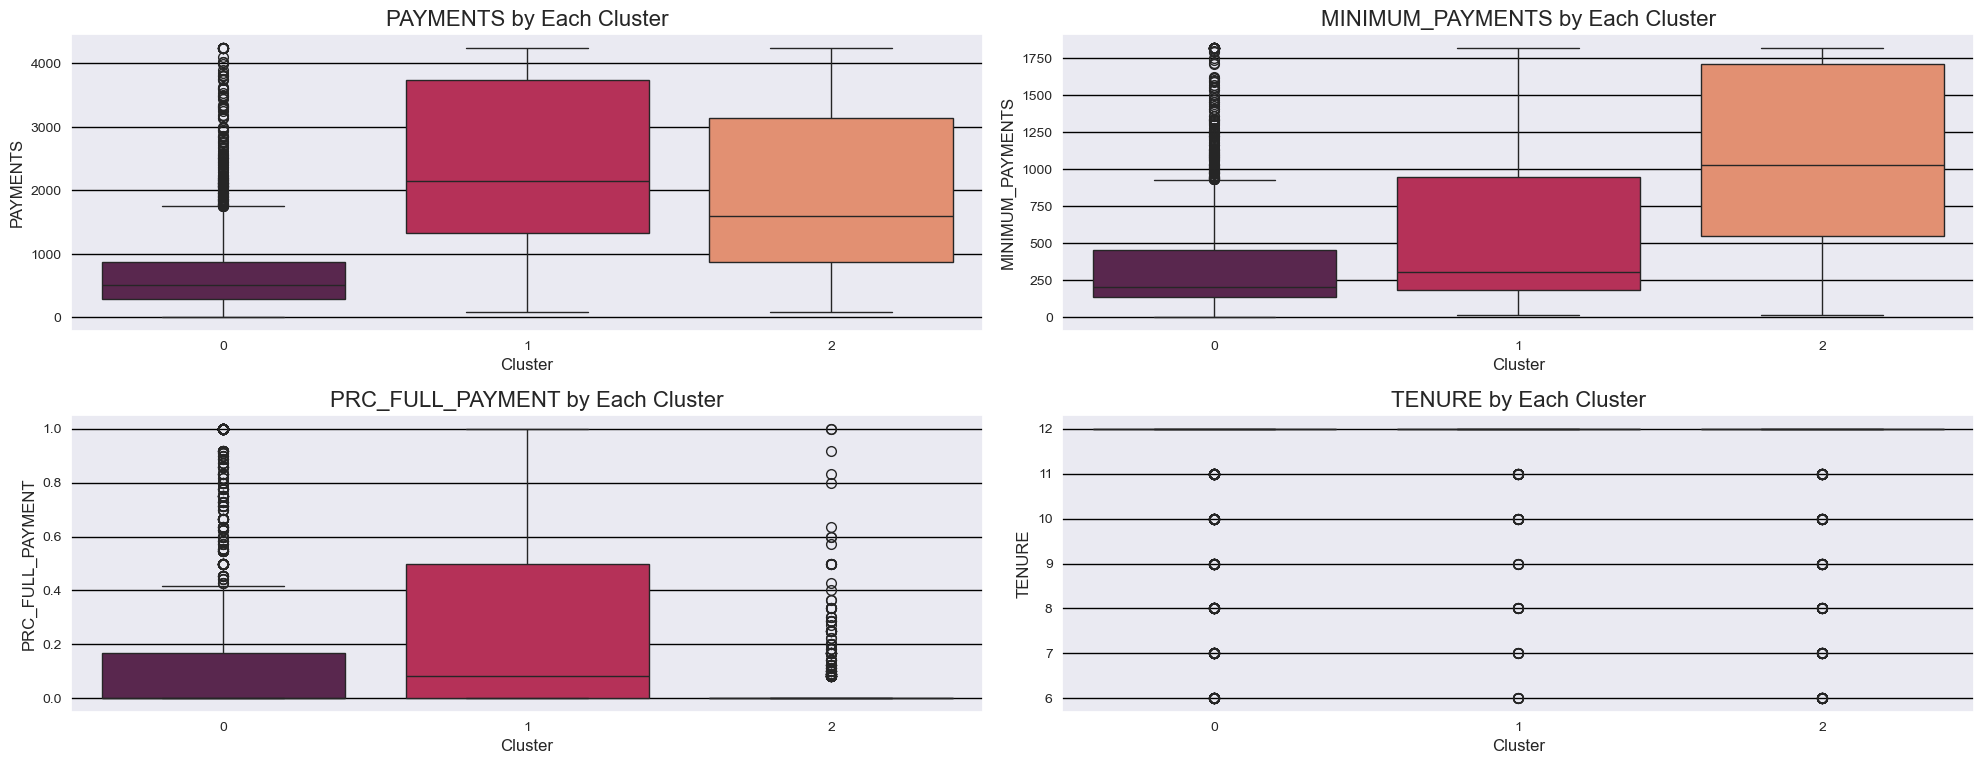

In [49]:
# Payments by cluster
# List of numeric columns to plot
numeric_columns = ['PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Plot size
plt.figure(figsize=(20, 15))

# Loop through each numeric column
for i, column in enumerate(numeric_columns):
     # Create a subplot for each numeric column against 'CLUSTER'
     plt.subplot(4, 2, i+1)
     sns.boxplot(x='CLUSTER', y=column, data=df, palette='rocket')
     plt.title(f'{column} by Each Cluster')
     plt.xlabel('Cluster')
     plt.ylabel(column)

# Adjust the subplot layout to make it neater
plt.tight_layout()
plt.show()

The visualization above is a comparison of payments for each cluster , where there are variations in each cluster

### 10.8 Conclusion EDA 2

There are some differences in the client behavior of each cluster.

**Cluster 0** are customers with low purchases (both installments and no installments) with very low credit limits, low remaining balances, low payments, low minimum bills and a low percentage of full payments compared to other clusters.

**Cluster 1** is customers with high purchases (both installments and no installments) with a high credit limit, a moderate remaining balance and high payments, a medium minimum bill and a relatively high percentage of full payments compared to other clusters.

**Cluster 2** are customers with low purchases (both installments and no installments) with a medium credit limit, have a high residual balance for use of the deposit, and medium payments, a high minimum bill and have a very low percentage of full payments compared to other clusters.

## 11. Model Saving

In [50]:
list_used_col = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
                 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
                 'TENURE']

In [51]:
# Saving Files
# Save the list of columns used by the model in a JSON file
with open('list_used_col.txt', 'w') as file_1:
   json.dump(list_used_col, file_1)

# Save the scaler model into a pickle file
with open('model_scaler.pkl', 'wb') as file_2:
   pickle.dump(scaler, file_2)

# Save the PCA model into a pickle file
with open('model_pca.pkl', 'wb') as file_3:
   pickle.dump(pca, file_3)

# Save the KMeans model into a pickle file
with open('model_kmeans.pkl', 'wb') as file_4:
   pickle.dump(km_optimal_model, file_4)

## 13. Conclusion

To segment a bank's credit card customers, it can be done using a clustering model, namely K-Means. After modeling, we find the segmentation is divided into 3 groups.

- **Segmentation 0** is customers with low transaction volumes (both installments and no installments), low credit limits, low remaining balances, low credit card bills, low minimum bills, and low full payment percentages. This segment is most likely those who often use credit cards to pay installments.

- **Segmentation 1** is a customer with a high volume of transactions (both installments and no installments), a high credit limit, a moderate remaining balance, a high credit card bill, a medium minimum bill, and a high percentage of full payments. This segmentation is most likely those who are classified as priority customers.

- **Segmentation 2** is customers with low transaction volumes (both installments and no installments), medium credit limits, high remaining balances, moderate credit card bills, high minimum bills, and low full payment percentages. This segmentation is most likely those who rarely use credit cards for payments, where their remaining balance is often unused, and one transaction is generally of high value and is payable in installments.

From the three customer segments that have been obtained, banks can adjust their marketing and business schemes according to their customer segmentation, such as determining benefits, promos and other business strategies.